# Project 2: Exploring the Relationship Between US Unemployment Rate and the S&P 500 (1995–2024)

In this project, I analyze whether there is a relationship between **the U.S. unemployment rate** and **the S&P 500 Index** over the period **1995 to 2024**.

Economic intuition suggests a **negative relationship**:
- When unemployment is high → economy weakens → stock market may fall  
- When unemployment is low → economy strong → stock market may rise  

In this notebook, I import two datasets: one for unemployment rate and one for S&P 500  
Dateset:
https://databank.worldbank.org/source/world-development-indicators#
https://www.slickcharts.com/sp500/returns



# Step 1. Import the Data

In [9]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML
from IPython.display import Image, display

# load unemployment data (World Bank extract)
unemp = pd.read_csv("../Data Extract from WB.csv")
unemp.info()
unemp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Country Name                                                                          32 non-null     object 
 1   Country Code                                                                          30 non-null     object 
 2   Time                                                                                  30 non-null     float64
 3   Time Code                                                                             30 non-null     object 
 4   GDP (current US$) [NY.GDP.MKTP.CD]                                                    30 non-null     float64
 5   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                             3

,Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],General government final consumption expenditure (current US$) [NE.CON.GOVT.CD],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Population, total [SP.POP.TOTL]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]
0,United States,USA,1995.0,YR1995,7.639749e+12,2.684431,28690.875701,1.468929,1.141743e+12,5.650,69.882820,266278000.0,10.639224
1,United States,USA,1996.0,YR1996,8.073122e+12,3.772773,29967.712718,2.572464,1.172889e+12,5.451,71.931229,269394000.0,10.746636
2,United States,USA,1997.0,YR1997,8.577552e+12,4.447128,31459.129969,3.197166,1.220529e+12,5.000,73.612758,272657000.0,11.119758
3,United States,USA,1998.0,YR1998,9.062817e+12,4.483133,32853.672595,3.272230,1.267608e+12,4.511,74.755433,275854000.0,10.515263
4,United States,USA,1999.0,YR1999,9.631172e+12,4.788425,34515.381307,3.591980,1.351428e+12,4.219,76.391102,279040000.0,10.309337


In [10]:
# load S&P 500 data
sp500 = pd.read_csv("../S&P 500 history.csv")
sp500.info()
sp500.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2024    98 non-null     int64  
 1   25.02   98 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


,2024,25.02
0,2023,26.29
1,2022,-18.11
2,2021,28.71
3,2020,18.40
4,2019,31.49


# Step 2. Data Cleaning 

In [11]:
# Keep only needed columns
unemp_new = unemp[
    [
        "Time",
        "Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
    ]
].rename(columns={
    "Time": "Year",
    "Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]": "Unemployment Rate"
})

unemp_new["Year"] = pd.to_numeric(unemp_new["Year"], errors="coerce")
unemp_new = unemp_new.dropna(subset=["Year"])
unemp_new["Year"] = unemp_new["Year"].astype(int)
unemp_new = unemp_new[unemp_new["Year"].between(1995, 2024)]

unemp_new.head()


,Year,Unemployment Rate
0,1995,5.650
1,1996,5.451
2,1997,5.000
3,1998,4.511
4,1999,4.219


In [12]:
# Clean S&P 500
sp500_new = pd.read_csv(
    "../S&P 500 history.csv",
    header=None,
    names=["Year", "SP500_Return"] 
)

sp500_new.head()

,Year,SP500_Return
0,2024,25.02
1,2023,26.29
2,2022,-18.11
3,2021,28.71
4,2020,18.40


In [13]:
sp500_new["Year"] = sp500_new["Year"].astype(int)
sp500_new["SP500_Return"] = pd.to_numeric(sp500_new["SP500_Return"], errors="coerce")

sp500_new = sp500_new.sort_values("Year").reset_index(drop=True)

sp500_new.head()

,Year,SP500_Return
0,1926,11.62
1,1927,37.49
2,1928,43.61
3,1929,-8.42
4,1930,-24.90


# Step 3. Merge two datasets

In [14]:
merged = pd.merge(unemp_new, sp500_new, on="Year", how="inner")
merged.head()

,Year,Unemployment Rate,SP500_Return
0,1995,5.650,37.58
1,1996,5.451,22.96
2,1997,5.000,33.36
3,1998,4.511,28.58
4,1999,4.219,21.04


# Step 4. Data Visualization

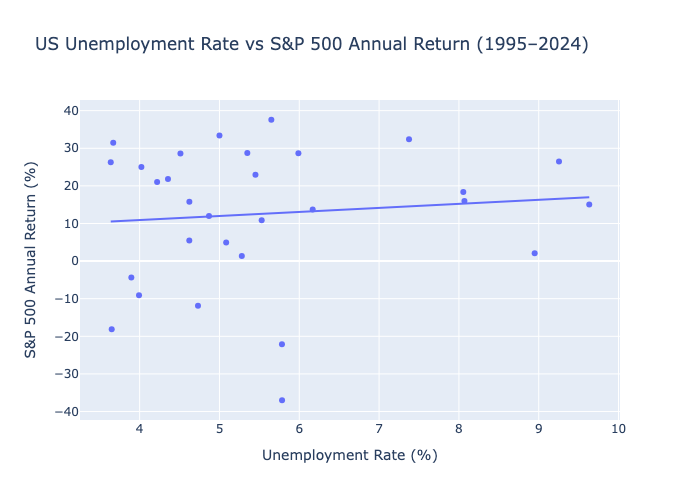

In [15]:
fig = px.scatter(
    merged,
    x="Unemployment Rate",
    y="SP500_Return",
    trendline="ols",
    title="US Unemployment Rate vs S&P 500 Annual Return (1995–2024)",
    labels={
        "Unemployment Rate": "Unemployment Rate (%)",
        "SP500_Return": "S&P 500 Annual Return (%)"
    }
)
HTML(fig.to_html(include_plotlyjs="cdn", full_html=False))
fig.write_image("unemp_vs_sp500_scatter.png")
display(Image("unemp_vs_sp500_scatter.png"))

Based on annual data from 1995–2024, there is no strong linear relationship between the U.S. unemployment rate and annual S&P 500 returns. This is not surprising because unemployment is a lagging indicator, while equity markets are forward-looking. In addition, unemployment changes slowly from year to year, whereas stock returns exhibit significant volatility. During recessions (2001, 2008, 2020), the relationship becomes clearer: stock market declines typically precede spikes in unemployment.

The weak correlation in the chart does not imply no relationship, it simply reflects the timing mismatch and different volatility levels between the two indicators.

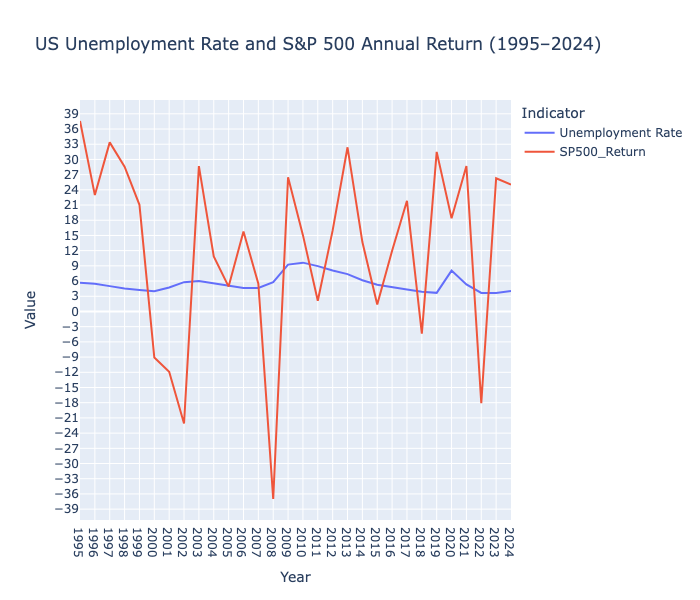

In [16]:
fig = px.line(
    merged,
    x="Year",
    y=["Unemployment Rate", "SP500_Return"],
    title="US Unemployment Rate and S&P 500 Annual Return (1995–2024)",
    labels={
        "value": "Value",
        "variable": "Indicator",
        "Year": "Year"
    }
)

fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=3)
fig.update_layout(
    legend_title="Indicator",
    height=600
)

HTML(fig.to_html(include_plotlyjs="cdn", full_html=False))
fig.write_image("unemp_sp500_lines.png")
display(Image("unemp_sp500_lines.png"))

The unemployment rate changes slowly over time, while S&P 500 returns fluctuate dramatically from year to year. As a result, the two series do not move closely together in the short term. During major economic downturns (2001–2003, 2008–2009, 2020), the S&P 500 typically declines before unemployment rises.   This reflects that financial markets price in expectations much faster than labor market conditions adjust.

Over longer cycles, recessions are marked by: falling stock returns and rising unemployment  
And recoveries show: rising stock returns and falling unemployment  
This reveals a clear cyclical (but not linear) negative relationship between the two indicators.

While the annual correlation between unemployment and stock returns is weak, the broader economic cycle shows a meaningful pattern which is that markets tend to fall before unemployment rises, and rise before unemployment declines.
